In [1]:
#Importing libraries

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Importing dataset

data=pd.read_csv("C:\\Users\\USER\\Desktop\\data.csv")
df = pd.DataFrame(data)
X = df.iloc[:,[1, 2, 4, 5, 6]].values
y = df.iloc[:,7].values

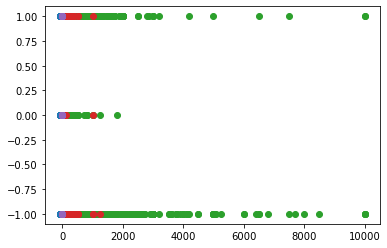

In [3]:
#Checking the correlation between the various features and label

plt.scatter(df['longitude'], df['RoomType'])
plt.scatter(df['latitude'], df['RoomType'])
plt.scatter(df['price'], df['RoomType'])
plt.scatter(df['minimum_nights'], df['RoomType'])
plt.scatter(df['Neighbourhood'], df['RoomType'])

In [4]:
#Splitting the dataset into Training and Test Sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [5]:
#Performing Feature Scaling on the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
#Fitting K-Nearest Neighbors to the Training Set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
#Predicting the Test set results

y_pred = classifier.predict(X_test)

In [8]:
#Generating a Classification Report and the Confusion Matrix/ Error Matrix 

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

          -1       0.83      0.85      0.84      7599
           0       0.63      0.34      0.44       349
           1       0.81      0.80      0.80      6721

    accuracy                           0.82     14669
   macro avg       0.75      0.66      0.69     14669
weighted avg       0.81      0.82      0.81     14669

[[6482    7 1110]
 [  47  117  185]
 [1291   62 5368]]


EXPLAINING THE VARIOUS PARAMETERS

-PRECISION: The ability of a classifier not to label an instance positive that is actually negative. It shows what percentage of your predictions were correct.

-RECALL: The ability of a classifier to find all positive instances. It shows the percentage of the positive cases the classifier was able to catch. 

-F1 SCORE: This is simply a merge of recall and precision. If the F1 Score is high then usually both recall and precision tend to be high. If it is low then the recall and precision tend to be bad.

